## 사전 준비 (pre-requirements)

- 미설치 라이브러리 : gensim
- 구글 드라이브 연결 : /gdrive
- 핵심 라이브러리 : tensorflow

In [ ]:
# 설치전 gensim==3.6.0
!pip install gensim==3.8.3 -U

import gensim
gensim.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'3.8.3'

In [2]:
from google.colab import drive
drive.mount('/gdrive')

# 파일을 못찾을 경우, 이렇게 확인을 해야 함!!
import os
os.chdir("/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data")
!ls -l

Mounted at /gdrive
total 52701
-rw------- 1 root root  188900 Jul  7 08:13 sample_submission.csv
-rw------- 1 root root  188888 Jul 25 09:17 submission_v2.csv
-rw------- 1 root root  188889 Jul 25 09:11 submission_v3.csv
-rw------- 1 root root  188889 Jul 25 13:52 submission_v4.csv
-rw------- 1 root root 2679138 Jul  7 08:13 test.csv
-rw------- 1 root root 8288753 Jul 24 11:11 test_mecab.csv
-rw------- 1 root root 7841571 Jul 24 11:35 test_okt.csv
-rw------- 1 root root 7650515 Jul 25 08:57 test_okt_stem.csv
-rw------- 1 root root 2738015 Jul  7 08:13 train.csv
-rw------- 1 root root 8366728 Jul 24 11:09 train_mecab.csv
-rw------- 1 root root 7916589 Jul 24 11:29 train_okt.csv
-rw------- 1 root root 7726432 Jul 25 07:25 train_okt_stem.csv


In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
import tensorflow as tf
# tf 라이브러리 또는 tf.keras 라이브러리는 모두 tf로 정의하세요 (번거로워도 헷갈림 방지)
# 그 외의 라이브러리는 from&import 로 직접 정의 (특히 keras)

np.random.seed(42)
tf.random.set_seed(42)

## 리뷰 평점 예측을 위한 LogisticRegression 모델

### 전체 과정

1. 데이터 준비
  - train_df 읽어오기
  - train, valid 분리
  - target(y) 전처리
2. 텍스트 벡터화
  - TfidfVectorizer
    - unigram, n-gram=(1,2) or (1,3) 
3. 모델 생성
  - LogisticRegression
4. 모델 훈련
  - optimizer, loss, metrics
  - fit
  - evaluate
5. 모델 활용(예측/분류)
  - 데이터 불러오기: test_df
  - 동일한 전처리와 벡터화 적용
  - predict
6. 모델 시각화 (실제값/예측값)
  - 예측값 시각화
  - 실제값 시각화
  

### LogisticRegression 모델

__참고__

- []()

### 1. 데이터 준비

- train_df 읽어오기
- train, valid 분리
- target(y) 전처리


In [3]:
# data_path = '~/Workspaces/keras/dacon-shopping-mall/review_data'
data_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# Okt 토크나이징
# ==> NaN, 한글자 제거 (rows=24981)
file_path = f'{data_path}/train_okt_stem.csv'

## Pickle 로딩
train_df = pd.read_csv(file_path)
# train_df = train_df.drop(['Unnamed: 0'], axis='columns')
print(train_df.shape)

train_df
# 24984 rows × 8 columns

(24984, 8)


,id,reviews,target,mrp_tokens,pos_tokens,mrp_tsize,pos_tsize,pos_csize
0,0,조아요 처음구입 싸게햇어요,2,조아요 처음 구입 싸게 햇 어 요,좋다 처음 구입 싸다 하다,7,5,10
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1,생각 보다 잘 안 돼요 매지 바른지 하루 밖에 안 됐는데 25천원 가량 주고 사기 ...,생각 자다 안 돼다 매다 바르다 하루 안 돼다 주다 사기 너무 아깝다,17,13,26
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2,디자인 은 괜찮은데 상품 이 금 이 가서 교환 했는데 두번째 받은 상품 도 까져있고...,디자인 괜찮다 상품 금 가다 교환 하다 두번째 받다 상품 끄다 안쪽 금 가다 귀찮다...,28,21,46
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2,기전 에 이 제품 말고 이마트 트 레이더스 에서만 팔던 프리미엄 제품 을 사용 했었...,기전 이 제품 이마트 트 레이더스 파다 프리미엄 제품 사용 하다 샘플 써다 보고 마...,53,39,82
4,4,튼튼하고 손목을 잘 받쳐주네요~,5,튼튼하고 손목 을 잘 받쳐주네요 ~,튼튼하다 손목 자다 받치다,6,4,11
...,...,...,...,...,...,...,...,...
24979,24995,일단향이너무너무좋은데지속력만좋다면좋겠지만..워낙저렴해그래도좋아여,5,일단 향 이 너무 너무 좋은데 지속 력 만 좋다면 좋겠지만 .. 워낙 저렴해 그래도...,일단 향 너무 너무 좋다 지속 력 좋다 좋다 워낙 저렴하다 그래도좋아,16,12,27
24980,24996,동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다.,2,동일한 업체 에서 발송 하고 한 상자 로 배송 되었는데 택배 비는 이중 처리 되었습...,동일하다 업체 발송 하다 상자 배송 되어다 택배 비다 이중 처리 되어다,16,12,28
24981,24997,향이 좋아요!! 다른 향도 시켜보고 싶어요,4,향 이 좋아요 !! 다른 향 도 시켜 보고 싶어요,향 좋다 다른 향 시키다 보고 싶다,10,7,13
24982,24998,펼쳐보니 끝부분쯤에 50cm정도 찟어져 있습니다 날짜관계로 구냥 사용합니다,2,펼쳐 보니 끝 부분 쯤 에 50 cm 정도 찟어져 있습니다 날짜 관계 로 구 냥 사...,펼치다 보다 끝 부분 쯤 정도 찟어져 있다 날짜 관계 구 사용 하다,18,13,25


In [6]:
from sklearn.model_selection import train_test_split

data = train_df
X_train, X_valid, y_train, y_valid = train_test_split(
    data[ ['reviews','pos_tokens'] ], 
    data['target'],
    test_size=0.2, 
    random_state=42, 
#     shuffle=True, 
    stratify=data['target']     # 클래스 비율 유지
)

# 동일한 float dtype으로 통일되도록 np.array로 재생성
# ==> 이거 안하면 object 타입으로 인식됨
y_train = np.array( y_train.to_list(), dtype='int8')
print( 'y_train:', type(y_train), y_train.dtype, y_train.shape, y_train[0] )
y_valid = np.array( y_valid.to_list(), dtype='int8')
print( 'y_valid :', type(y_valid), y_valid.dtype, y_valid.shape, y_valid[0] )
print()


# 크기를 확인합니다.
print( 'train 데이터 셋 모양 :', X_train.shape, y_train.shape)
print( 'valid 데이터 셋 모양 :', X_valid.shape, y_valid.shape)

y_train: <class 'numpy.ndarray'> int8 (19987,) 2
y_valid : <class 'numpy.ndarray'> int8 (4997,) 4

train 데이터 셋 모양 : (19987, 2) (19987,)
valid 데이터 셋 모양 : (4997, 2) (4997,)


### 2. 텍스트 벡터화

- TfidfVectorizer
  - unigram: min_df=2
  - n-gram=(1,2): min_df=3

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용하여 벡터화 

# BEST: acc=0.634 (min_df=2, vocab=6196)
vectorizer = TfidfVectorizer(min_df=2)
vectorizer.fit(X_train['pos_tokens'])

X_train_vec = vectorizer.transform(X_train['pos_tokens'])
X_valid_vec = vectorizer.transform(X_valid['pos_tokens'])
print('TfidfVectorizer Shape:', X_train_vec.shape, X_valid_vec.shape)
print()

# 변환이 잘 되었나 확인합니다.
print(X_train_vec[10])
print()

# inverse_transform을 사용해 원문을 확인할 수 있습니다.
print(X_train.iloc[10,1])
vectorizer.inverse_transform(X_train_vec[10])

TfidfVectorizer Shape: (19987, 6196) (4997, 6196)

  (0, 4460)	0.5222854804211886
  (0, 2891)	0.3990897132616194
  (0, 1740)	0.4350084283309301
  (0, 1036)	0.5140979629017481
  (0, 159)	0.3382546814624942

생각 많이 구깃구깃 해 막 입다 옷 같다 느낌


[array(['입다', '생각', '많이', '느낌', '같다'], dtype='<U6')]

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용하여 벡터화 

# BEST: acc=0.647 (min_df=2, vocab=23222)
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2)
vectorizer.fit(X_train['pos_tokens'])

X_train_vec = vectorizer.transform(X_train['pos_tokens'])
X_valid_vec = vectorizer.transform(X_valid['pos_tokens'])
print('TfidfVectorizer Shape:', X_train_vec.shape, X_valid_vec.shape)
print()

# 변환이 잘 되었나 확인합니다.
print(X_train_vec[10])
print()

# inverse_transform을 사용해 원문을 확인할 수 있습니다.
print(X_train.iloc[10,1])
vectorizer.inverse_transform(X_train_vec[10])

TfidfVectorizer Shape: (19987, 23222) (4997, 23222)

  (0, 16253)	0.5543748789006263
  (0, 16250)	0.29338906737021286
  (0, 10950)	0.43699971988330816
  (0, 10906)	0.22418497768011478
  (0, 6180)	0.24436198567739462
  (0, 3884)	0.2887898046697281
  (0, 596)	0.43144756804451095
  (0, 550)	0.1900114578101213

생각 많이 구깃구깃 해 막 입다 옷 같다 느낌


[array(['입다 같다', '입다', '생각 많이', '생각', '많이', '느낌', '같다 느낌', '같다'],
       dtype='<U10')]

### 3. 모델 생성

- LogisticRegression: solver=liblinear
  - solver='lbfgs' 는 실험상 모든 경우에 정확도가 낮았음

In [9]:
# 모델 훈련 전에 타입 확인
print( 'X_train_vec:', type(X_train_vec), X_train_vec.dtype, X_train_vec.shape, np.isnan(np.sum(X_train_vec)))
print( 'y_train    :', type(y_train), y_train.dtype, y_train.shape, np.isnan(np.sum(y_train)))
print( 'X_valid_vec :', type(X_valid_vec), X_valid_vec.dtype, X_valid_vec.shape, np.isnan(np.sum(X_valid_vec)))
print( 'y_valid     :', type(y_valid), y_valid.dtype, y_valid.shape, np.isnan(np.sum(y_valid)))

# dtype='object'로 표시되면 안됨!! (오류 발생)
# => ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

X_train_vec: <class 'scipy.sparse.csr.csr_matrix'> float64 (19987, 23222) False
y_train    : <class 'numpy.ndarray'> int8 (19987,) False
X_valid_vec : <class 'scipy.sparse.csr.csr_matrix'> float64 (4997, 23222) False
y_valid     : <class 'numpy.ndarray'> int8 (4997,) False


In [10]:
# 사용자 정의 변수
temp_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/temp"


In [11]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', max_iter=500, random_state=42)

### 4. 모델 훈련

- fit
- predict & 평가


In [12]:
# 훈련
lr_clf.fit(X_train_vec, y_train)
# 평가
pred = lr_clf.predict(X_valid_vec)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(metrics.accuracy_score(y_valid, pred)))

TF-IDF Logistic Regression 의 예측 정확도는 0.647


### 5. 모델 활용(예측/분류)

- 데이터 불러오기: test_df
- 동일한 전처리와 벡터화 적용
- predict


In [13]:
# data_path = '~/Workspaces/keras/dacon-shopping-mall/review_data'
data_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# Okt 토크나이징 데이터 로딩
# ==> NaN, 한글자 제거 (rows=24986)
test_df = pd.read_csv(f'{data_path}/test_okt_stem.csv')
test_df

,id,reviews,mrp_tokens,pos_tokens,mrp_tsize,pos_tsize,pos_csize
0,0,채소가 약간 시들어 있어요,채소 가 약간 시들어 있어요,채소 약간 시들다 있다,5,4,9
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리 고 힘 이 없어서 들어...,발톱 두껍다 단단하다 분들 써다 소용없다 이 테이프 물렁거리 힘 없다 들다 올리다 ...,24,21,50
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요,부들부들 좋네요 입어보고 시원하면 또 살게요,부들부들 좋다 입어보다 시원하다 또 살다,6,6,17
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?,이런 1 . 8 골드 주 라니깐 파란 개 오네 회사 전화 걸어도 받지도 않고 머 하...,이렇다 골드 주 파란 개 오다 회사 전화 걸다 받다 않다 머 하다 임,19,14,25
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요,검수 도 없이 보내구 불량 배송비 5000원 청구 하네요 완전 별로 별하나 도 아까워요,검수 없이 보내다 불량 배송비 청구 하다 완전 별로 별하나 아깝다,14,11,26
...,...,...,...,...,...,...,...
24984,24995,사용해보니 좋아요~^^,사용 해보니 좋아요 ~^^,사용 해보다 좋다,4,3,7
24985,24996,저렴한가격에. 질좋고. 핏좋고. 너무. 이쁘게. 입고다녀요..,저렴한 가격 에 . 질 좋고 . 핏좋 고 . 너무 . 이쁘게 . 입고 다녀요 ..,저렴하다 가격 질 좋다 핏좋 너무 이쁘다 입다 다니다,17,9,21
24986,24997,세트상품이라고 써있어서 그런줄 알고 구매했더니 단품이었네요 낚인 느낌도 들고 그러네...,세트 상품 이라고 써있어서 그런줄 알 고 구매 했더니 단 품 이었네요 낚 인 느낌 ...,세트 상품 써다 그렇다 알 구매 하다 단 품 이다 낚 느낌 들다 그렇다 딘품 표시 ...,40,31,55
24987,24998,역시 로네펠트!! 좋아요.,역시 로 네 펠트 !! 좋아요 .,역시 로 네 펠트 좋다,7,5,8


In [15]:
# TFIDF 벡터화
Z_test_vec = vectorizer.transform(test_df['pos_tokens'])
print('TfidfVectorizer Shape:', Z_test_vec.shape)
print()

# inverse_transform을 사용해 원문을 확인할 수 있습니다.
print(test_df.iloc[10,1])
print('==>', vectorizer.inverse_transform(Z_test_vec[10]), end='\n\n')


TfidfVectorizer Shape: (24989, 23222)

생각보다 많이 얇아요.
==> [array(['얇다', '생각 많이', '생각', '많이 얇다', '많이'], dtype='<U10')]



In [16]:
# 예측값 생성
test_df['pred_target'] = lr_clf.predict(Z_test_vec)
print('len(pred)=', len(test_df['pred_target']))

# 24989 rows × 8 columns (11개 행 제거)
test_df

len(pred)= 24989


,id,reviews,mrp_tokens,pos_tokens,mrp_tsize,pos_tsize,pos_csize,pred_target
0,0,채소가 약간 시들어 있어요,채소 가 약간 시들어 있어요,채소 약간 시들다 있다,5,4,9,2
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리 고 힘 이 없어서 들어...,발톱 두껍다 단단하다 분들 써다 소용없다 이 테이프 물렁거리 힘 없다 들다 올리다 ...,24,21,50,2
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요,부들부들 좋네요 입어보고 시원하면 또 살게요,부들부들 좋다 입어보다 시원하다 또 살다,6,6,17,5
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?,이런 1 . 8 골드 주 라니깐 파란 개 오네 회사 전화 걸어도 받지도 않고 머 하...,이렇다 골드 주 파란 개 오다 회사 전화 걸다 받다 않다 머 하다 임,19,14,25,2
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요,검수 도 없이 보내구 불량 배송비 5000원 청구 하네요 완전 별로 별하나 도 아까워요,검수 없이 보내다 불량 배송비 청구 하다 완전 별로 별하나 아깝다,14,11,26,1
...,...,...,...,...,...,...,...,...
24984,24995,사용해보니 좋아요~^^,사용 해보니 좋아요 ~^^,사용 해보다 좋다,4,3,7,5
24985,24996,저렴한가격에. 질좋고. 핏좋고. 너무. 이쁘게. 입고다녀요..,저렴한 가격 에 . 질 좋고 . 핏좋 고 . 너무 . 이쁘게 . 입고 다녀요 ..,저렴하다 가격 질 좋다 핏좋 너무 이쁘다 입다 다니다,17,9,21,5
24986,24997,세트상품이라고 써있어서 그런줄 알고 구매했더니 단품이었네요 낚인 느낌도 들고 그러네...,세트 상품 이라고 써있어서 그런줄 알 고 구매 했더니 단 품 이었네요 낚 인 느낌 ...,세트 상품 써다 그렇다 알 구매 하다 단 품 이다 낚 느낌 들다 그렇다 딘품 표시 ...,40,31,55,2
24987,24998,역시 로네펠트!! 좋아요.,역시 로 네 펠트 !! 좋아요 .,역시 로 네 펠트 좋다,7,5,8,5


In [ ]:
# 예측값 후처리: pred_cate => pred_target
# 후처리 예제 np.argmax([0.0, 0.0, 0.0, 0.0, 1.0])+1 => 5 

pred_target = np.array([ np.argmax(cate)+1 for cate in pred_cate ], dtype='int8')
print( pred_target.dtype, np.shape(pred_target), pred_target[0] )

# 예측값 저장
test_df['pred_target'] = pred_target.tolist()
test_df.head()

int8 (24989,) 2


,id,reviews,mrp_tokens,pos_tokens,mrp_tsize,pos_tsize,pos_csize,pred_target
0,0,채소가 약간 시들어 있어요,채소 가 약간 시들어 있어요,채소 약간 시들다 있다,5,4,9,2
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리 고 힘 이 없어서 들어...,발톱 두껍다 단단하다 분들 써다 소용없다 이 테이프 물렁거리 힘 없다 들다 올리다 ...,24,21,50,2
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요,부들부들 좋네요 입어보고 시원하면 또 살게요,부들부들 좋다 입어보다 시원하다 또 살다,6,6,17,5
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?,이런 1 . 8 골드 주 라니깐 파란 개 오네 회사 전화 걸어도 받지도 않고 머 하...,이렇다 골드 주 파란 개 오다 회사 전화 걸다 받다 않다 머 하다 임,19,14,25,2
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요,검수 도 없이 보내구 불량 배송비 5000원 청구 하네요 완전 별로 별하나 도 아까워요,검수 없이 보내다 불량 배송비 청구 하다 완전 별로 별하나 아깝다,14,11,26,1


### 6. 모델 시각화 (실제값/예측값)

- 예측값 시각화
- 실제값 시각화


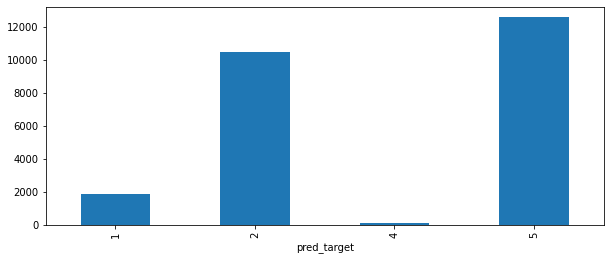

In [20]:
# 예측값
test_df.groupby('pred_target').count()['id'].plot.bar(figsize=(10,4))

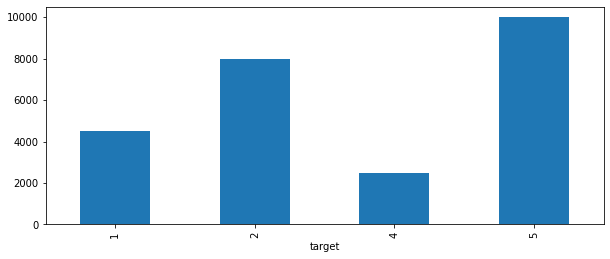

In [ ]:
# 훈련용 실제값
train_df.groupby('target').count()['id'].plot.bar(figsize=(10,4))

### 7. 예측값 저장 (제출용)


In [17]:
data_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# 제출용 파일 불러오기
submission = pd.read_csv(f'{data_path}/sample_submission.csv') 
print(submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      25000 non-null  int64
 1   target  25000 non-null  int64
dtypes: int64(2)
memory usage: 390.8 KB
None


In [18]:
# 예측값을 제출용 DF과 합치기 (NaN값 포함)

# left join: drop 된 rows 은 NaN 처리
submission_pred = pd.merge( 
    submission, 
    test_df[['id','pred_target']], 
    on='id',
    how='left'       # left, outer, right
    )
print('after MERGE:', submission_pred.shape )

# left join 으로 인한 NaN 조회
print(submission_pred.isna().sum())

# NaN 행 확인 (삭제되었던 11개 행 맞음)
submission_pred[ submission_pred.isna().any(axis=1) ]

# merge 되면서 pred_target 이 float 로 바뀌었음 (왜지?)

# df1.join(df2) : 기본적으로 left join
# pd.merge(df1, df2, left_index=True, right_index=True) : 기본 inner join
# pd.concat([df1, df2], axis=1) : 기본 outer join

after MERGE: (25000, 3)
id              0
target          0
pred_target    11
dtype: int64


,id,target,pred_target
790,790,0,NaN
1932,1932,0,NaN
2989,2989,0,NaN
6621,6621,0,NaN
8241,8241,0,NaN
10889,10889,0,NaN
10901,10901,0,NaN
11422,11422,0,NaN
11881,11881,0,NaN
21228,21228,0,NaN


In [19]:
# NaN 값을 포함한 컬럼의 형 변환시에는
# nullable 가능한 pd.Int64Dtype() 으로 바꿔야 가능
submission_pred['target'] = submission_pred['pred_target'].astype('Int8')

# 기존 target 컬럼 삭제
submission_pred = submission_pred.drop(columns=['pred_target'])

# 확인
submission_pred.dtypes

# **참고: 컬럼 이름 변경 
# submission_pred = submission_pred.rename(columns={'pred_target' : 'target'})

id        int64
target     Int8
dtype: object

In [ ]:
import pandas as pd
data_path="/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# submission.csv 저장
submission_pred.to_csv(data_path+'/submission_v3.csv', index=False, encoding='utf-8')

# ==> 채점 0.647 ()

---

## 정확도 관련 파라미터 상관관계 시각화

정확도와 n-gram, min_df, max_df 상관관계 시각화 (히트맵)

- TfidfVectorizer: ngram, min_df, max_df 입력
- LogistricRegression: accuracy 출력 
- 출력값을 DataFrame 으로 만들어 컬럼별 corr(상관계수) 생성
- heatmap 그리기 (mask로 반쪽만)

In [23]:
def experiment(ngram_tp, min_df, max_df):
  vectorizer = TfidfVectorizer(ngram_range=ngram_tp, min_df=min_df, max_df=max_df)
  vectorizer.fit(X_train['pos_tokens'])
  X_train_vec = vectorizer.transform(X_train['pos_tokens'])
  X_valid_vec = vectorizer.transform(X_valid['pos_tokens'])

  lr_clf = LogisticRegression(solver='liblinear', max_iter=500, random_state=42)
  lr_clf.fit(X_train_vec, y_train)
  pred = lr_clf.predict(X_valid_vec)
  return (
      X_train_vec.shape[1], 
      X_valid_vec.shape[1], 
      metrics.accuracy_score(y_valid, pred)
    )


params={
  'ngram_tp': [ (1,3),(1,2),(1,1), (2,3),(2,2), (3,3) ],
  'min_df': [ 1, 2, 3, 4, 5 ],
  'max_df': [ 1.0, 0.8, 0.6, 0.4, 0.2 ],
}

# 실험 결과 저장
records = []

# 모든 경우 조합: 6 x 5 x 5 = 150
idx = 0
for ngram_tp in params['ngram_tp']:
  p1 = f'ngram_{ngram_tp[0]}{ngram_tp[1]}'

  for min_df in params['min_df']:
    p2 = f'min_df={min_df}'
    max_df = 1.0
    p3 = f'max_df={max_df}'

    idx += 1
    shape1, shape2, acc = experiment(ngram_tp, min_df, max_df)
    print(f'ex[{idx:03d}]: {p1}, {p2}, {p3} ==> acc={acc:.3f}, vocab={shape1}')

    records.append([
      idx, 
      ngram_tp[0],
      ngram_tp[1],
      min_df,
      max_df,
      shape1, 
      shape2, 
      acc
    ])

  for max_df in params['max_df']:
    p3 = f'max_df={max_df}'
    min_df = 1
    p2 = f'min_df={min_df}'

    idx += 1
    shape1, shape2, acc = experiment(ngram_tp, min_df, max_df)
    print(f'ex[{idx:03d}]: {p1}, {p2}, {p3} ==> acc={acc:.3f}, vocab={shape1}')

    records.append([
      idx, 
      ngram_tp[0],
      ngram_tp[1],
      min_df,
      max_df,
      shape1, 
      shape2, 
      acc
    ])

print('\n...done: records=', len(records))

ex[001]: ngram_13, min_df=1, max_df=1.0 ==> acc=0.641, vocab=246986
ex[002]: ngram_13, min_df=2, max_df=1.0 ==> acc=0.646, vocab=29158
ex[003]: ngram_13, min_df=3, max_df=1.0 ==> acc=0.646, vocab=14898
ex[004]: ngram_13, min_df=4, max_df=1.0 ==> acc=0.643, vocab=10107
ex[005]: ngram_13, min_df=5, max_df=1.0 ==> acc=0.640, vocab=7760
ex[006]: ngram_13, min_df=1, max_df=1.0 ==> acc=0.641, vocab=246986
ex[007]: ngram_13, min_df=1, max_df=0.8 ==> acc=0.641, vocab=246986
ex[008]: ngram_13, min_df=1, max_df=0.6 ==> acc=0.641, vocab=246986
ex[009]: ngram_13, min_df=1, max_df=0.4 ==> acc=0.641, vocab=246986
ex[010]: ngram_13, min_df=1, max_df=0.2 ==> acc=0.632, vocab=246984
ex[011]: ngram_12, min_df=1, max_df=1.0 ==> acc=0.645, vocab=110235
ex[012]: ngram_12, min_df=2, max_df=1.0 ==> acc=0.647, vocab=23222
ex[013]: ngram_12, min_df=3, max_df=1.0 ==> acc=0.645, vocab=12841
ex[014]: ngram_12, min_df=4, max_df=1.0 ==> acc=0.643, vocab=8996
ex[015]: ngram_12, min_df=5, max_df=1.0 ==> acc=0.643, vo

In [24]:
ex_df = pd.DataFrame(records, columns=['id','ng_head','ng_tail','df_min','df_max','shape1','shape2','acc'])
ex_df.index = ex_df['id']
ex_df.drop(columns=['id'], inplace=True)
ex_df

,ng_head,ng_tail,df_min,df_max,shape1,shape2,acc
id,,,,,,,
1,1,3,1,1.0,246986,246986,0.641185
2,1,3,2,1.0,29158,29158,0.645787
3,1,3,3,1.0,14898,14898,0.645587
4,1,3,4,1.0,10107,10107,0.642586
5,1,3,5,1.0,7760,7760,0.640184
6,1,3,1,1.0,246986,246986,0.641185
7,1,3,1,0.8,246986,246986,0.641185
8,1,3,1,0.6,246986,246986,0.641185
9,1,3,1,0.4,246986,246986,0.641185


In [25]:
max_acc = ex_df['acc'].max(skipna=False)
print('max acc=', max_acc)

# 정확도 최대값 기록 
ex_df[ ex_df['acc']==max_acc ]

max acc= 0.6471883129877927


,ng_head,ng_tail,df_min,df_max,shape1,shape2,acc
id,,,,,,,
12,1,2,2,1.0,23222,23222,0.647188


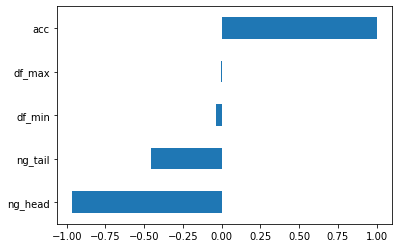

In [26]:
acc_corr = ex_df[['ng_head', 'ng_tail', 'df_min', 'df_max', 'acc']].corr()['acc'][:]
acc_corr.plot(kind='barh')

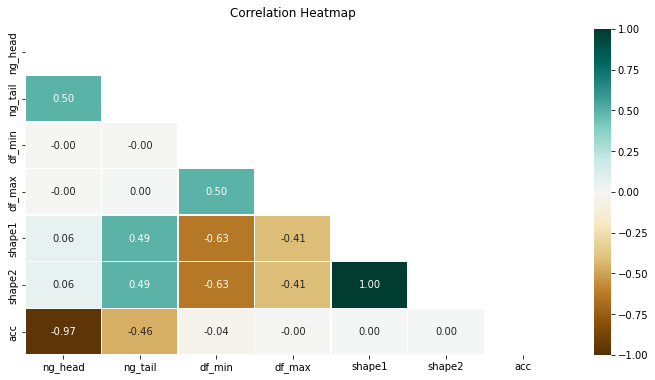

In [27]:
df_corr = ex_df.corr()

plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(df_corr, dtype=bool))
heatmap = sns.heatmap(data = df_corr, mask=mask, fmt='.2f', vmin=-1, vmax=1, annot=True, linewidths=.5, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

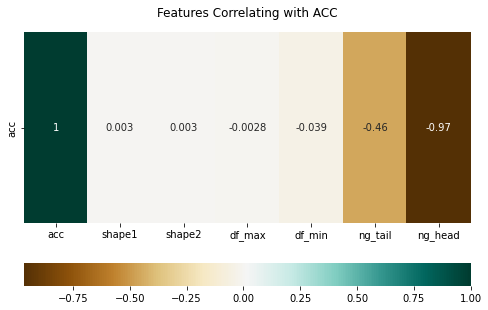

In [28]:
# 가로로 눞혀서 출력하려고 전치행렬(T)를 사용했음
df_corr = ex_df.corr()[['acc']].sort_values(by='acc', ascending=False).T

plt.figure(figsize=(8, 5))
heatmap = sns.heatmap(df_corr, annot=True, cmap='BrBG', cbar_kws={"orientation": "horizontal"})
heatmap.set_title('Features Correlating with ACC', fontdict={'fontsize':12}, pad=16);
